# Handwriting Recognition Project

This project aims to recognize handwritten digits using machine learning. We have used the MNIST dataset to train our models. We have implemented two models: Sequential Model and Convolutional Neural Network. We have trained both models and tested them on the test data. We have also tested the models on some handwritten digits. In this notebook, you will find the code for training, testing, and using the models.


**Importing the required libraries**

In [3]:
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from keras.models import load_model
import numpy as np

**Loading the dataest, train and test split**

This code focuses on loading and preprocessing the MNIST dataset, a widely used dataset in the field of machine learning for handwritten digit recognition.

1. Importing the MNIST Dataset:
   - The MNIST dataset is a collection of 28x28 pixel grayscale images of handwritten digits (0 through 9).
   - It is commonly used for training and testing machine learning models, particularly for image classification tasks.

2. Loading Training and Testing Data:
   - The 'mnist.load_data()' function is used to load the training and testing data.
   - It returns two tuples: (x_train, y_train) for training data and labels, and (x_test, y_test) for testing data and labels.

3. Normalizing the Data:
   - The pixel values of the images are normalized to the range [0, 1].
   - Normalization ensures that the input features have similar scales, facilitating model training and convergence.

4. Data Structures:
   - 'x_train' and 'x_test' represent the normalized pixel values of the images.
   - 'y_train' and 'y_test' contain the corresponding labels (digits) for the training and testing data.

5. TensorFlow Usage:
   - TensorFlow (tf.keras) is used for loading and normalizing the dataset.
   - TensorFlow is an open-source machine learning library, and tf.keras is the high-level API for building and training deep learning models.

In [11]:
# import the MNIST dataset
mnist = tf.keras.datasets.mnist

# load the training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize the training and testing data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Model Implementation

**Sequential Model**

This code constructs a neural network model for recognizing handwritten digits from the MNIST dataset. The model is built using TensorFlow's Keras API, a high-level interface for building and training deep learning models.

1. Model Initialization:
   - A sequential model is created using 'tf.keras.models.Sequential()'.
   - Sequential models are linear stacks of layers, where each layer has exactly one input tensor and one output tensor.

2. Input Layer:
   - The input layer is added using 'model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))'.
   - The Flatten layer transforms the 28x28 pixel images into a flat 1D array, preparing them for the dense layers.

3. Dense Hidden Layers:
   - Two dense (fully connected) hidden layers are added with 128 neurons each and ReLU activation functions.
   - This architecture allows the model to learn complex patterns in the input data.

4. Output Layer:
   - The output layer is added with 10 neurons and a softmax activation function.
   - Softmax converts the model's raw output into probability values, indicating the likelihood of each digit (0 through 9).

5. Model Compilation:
   - The model is compiled using 'model.compile()'.
   - 'adam' is chosen as the optimizer, a popular choice for gradient-based optimization algorithms.
   - 'sparse_categorical_crossentropy' is used as the loss function, suitable for integer-encoded labels.
   - The 'accuracy' metric is chosen to monitor the model's performance during training.

In [12]:
# build model
model = tf.keras.models.Sequential()

# input layer
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# model training
model.fit(x_train, y_train, epochs=5)
model.save('handwriting_recognition.model')

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2609 - accuracy: 0.9252
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1065 - accuracy: 0.9676
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0719 - accuracy: 0.9782
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0540 - accuracy: 0.9825
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0404 - accuracy: 0.9868
INFO:tensorflow:Assets written to: handwriting_recognition.model\assets


INFO:tensorflow:Assets written to: handwriting_recognition.model\assets


**Convolutional Neural Network**

This code constructs a Convolutional Neural Network (CNN) model for recognizing handwritten digits from the MNIST dataset. The model is built using TensorFlow's Keras API, a high-level interface for building and training deep learning models.

1. Model Initialization:
   - A sequential model is created using 'tf.keras.models.Sequential()', representing a linear stack of layers.

2. Convolutional Layers:
   - Three convolutional layers are added to capture spatial hierarchies in the input images:
     - First Conv2D layer with 32 filters, a 3x3 kernel, 'relu' activation, and input shape (28, 28, 1).
     - MaxPooling2D layer with a 2x2 pooling window after the first convolutional layer.
     - Second Conv2D layer with 64 filters and a 3x3 kernel, followed by another MaxPooling2D layer.
     - Third Conv2D layer with 64 filters and a 3x3 kernel.

3. Flattening and Dense Layers:
   - The Flatten layer transforms the output of the convolutional layers into a 1D array.
   - A Dense layer with 64 neurons and 'relu' activation is added for further feature processing.
   - The output layer with 10 neurons (for each digit 0 through 9) and 'softmax' activation is included for probability distribution.

4. Model Compilation:
   - The model is compiled using 'model.compile()'.
   - 'adam' is chosen as the optimizer, a popular choice for gradient-based optimization algorithms.
   - 'sparse_categorical_crossentropy' is used as the loss function, suitable for integer-encoded labels.
   - The 'accuracy' metric is chosen to monitor the model's performance during training.


In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# model training
model.fit(x_train, y_train, epochs=4)
model.save('handwriting_recognition(cnn).model')


Epoch 1/4
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1713 - accuracy: 0.9482
Epoch 2/4
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0529 - accuracy: 0.9843
Epoch 3/4
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0385 - accuracy: 0.9875
Epoch 4/4
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0293 - accuracy: 0.9907
INFO:tensorflow:Assets written to: handwriting_recognition(cnn).model\assets


INFO:tensorflow:Assets written to: handwriting_recognition(cnn).model\assets


# Model Testing

**Using Sequential Model**

In [16]:
# sequential model
# load model
model = tf.keras.models.load_model('handwriting_recognition.model')

# evaluate model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print('loss: ', loss)
print('accuracy: ', accuracy)

313/313 [==============================] - 0s 915us/step - loss: 0.0914 - accuracy: 0.9739
loss:  0.0913509801030159
accuracy:  0.9739000201225281


**Using Convolutional Neural Network**

In [18]:
# convolutional neural network
# load model
model = tf.keras.models.load_model('handwriting_recognition(cnn).model')

# evaluate model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print('loss: ', loss)
print('accuracy: ', accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0389 - accuracy: 0.9876
loss:  0.03886059299111366
accuracy:  0.9876000285148621


Based on the results of the model testing, the conclusions for the Sequential and CNN models are as follows:

**Sequential Model:**
- **Loss:** 0.0914
- **Accuracy:** 97.39%

The Sequential model, which consists of densely connected layers, achieved a high accuracy of 97.39%. This indicates that the model successfully learned and generalized patterns in the MNIST dataset, resulting in accurate predictions.

**CNN Model:**
- **Loss:** 0.0389
- **Accuracy:** 98.76%

The CNN model, incorporating convolutional and pooling layers, outperformed the Sequential model with an accuracy of 98.76%. The CNN's ability to capture spatial hierarchies in the images contributed to improved recognition performance.

**Conclusion:**
- The CNN model demonstrated superior performance over the Sequential model in terms of both loss and accuracy.
- The CNN's architecture, designed to handle image data with convolutional layers, proved effective for the MNIST digit recognition task.
- Overall, the results suggest that utilizing convolutional layers is beneficial for image classification tasks compared to a purely sequential architecture.

# Model Testing

Now, to assess the model's performance, we will conduct tests on handwritten digits. Leveraging the cv2 library, we'll read the images, convert them into numpy arrays using the numpy library, and further process them into PIL images using the PIL library. The model will then predict the digit, and we will use the matplotlib library to visualize both the original image and the predicted digit. This comprehensive testing process allows us to evaluate the model's accuracy and effectiveness in recognizing handwritten digits.

**Using Convolutional Neural Network**

1/1 [==============================] - 0s 52ms/step
The number is probably a 1


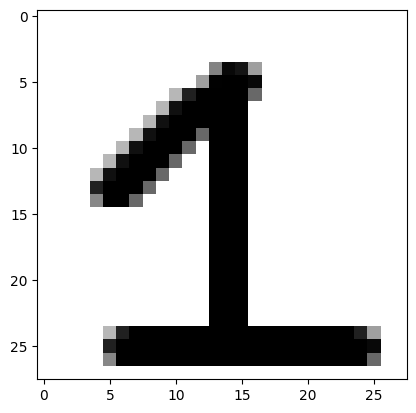

1/1 [==============================] - 0s 16ms/step
The number is probably a 2


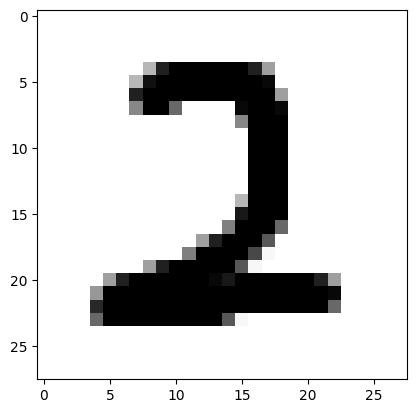

1/1 [==============================] - 0s 18ms/step
The number is probably a 3


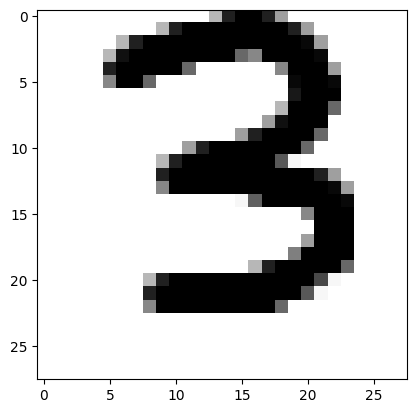

1/1 [==============================] - 0s 15ms/step
The number is probably a 4


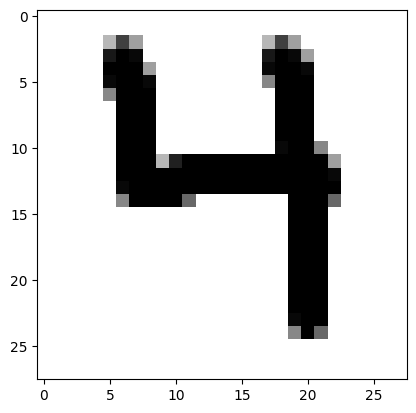

1/1 [==============================] - 0s 15ms/step
The number is probably a 5


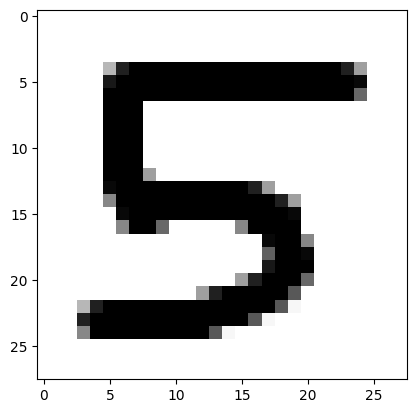

1/1 [==============================] - 0s 17ms/step
The number is probably a 6


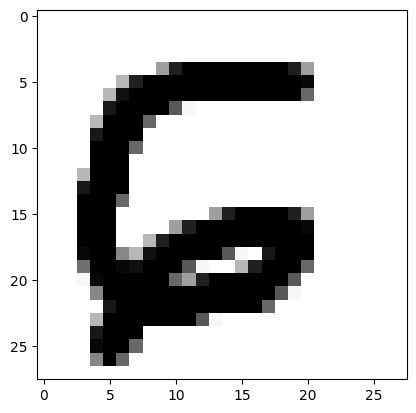

1/1 [==============================] - 0s 15ms/step
The number is probably a 7


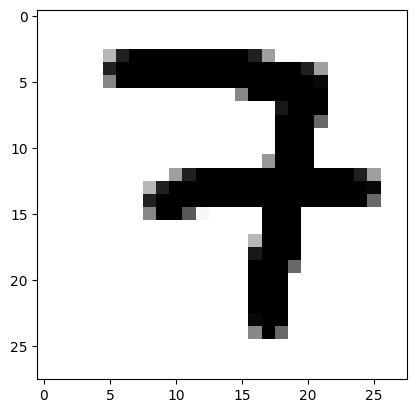

1/1 [==============================] - 0s 15ms/step
The number is probably a 8


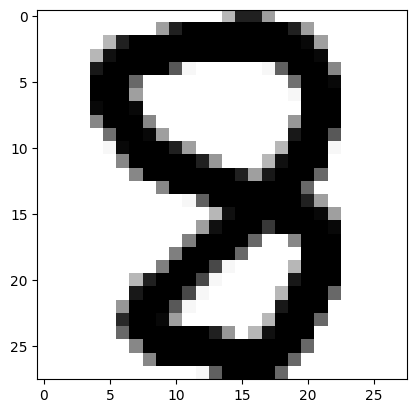

1/1 [==============================] - 0s 16ms/step
The number is probably a 7


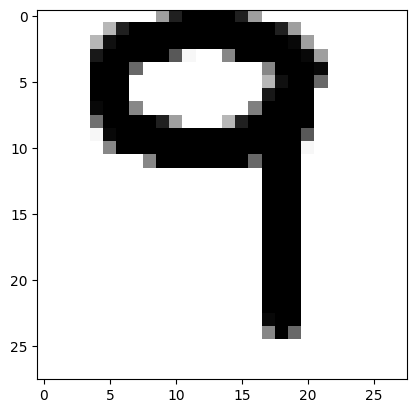

In [8]:
# test model
model = tf.keras.models.load_model('handwriting_recognition(cnn).model')
# test model
image_number = 1
while os.path.isfile(f"digits/digit{image_number}.png"):
    try:
        img = cv2.imread(f"digits/digit{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"The number is probably a {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("An exception occurred")
    finally:
        image_number += 1

**Using Sequential Model**

1/1 [==============================] - 0s 37ms/step
The number is probably a 5


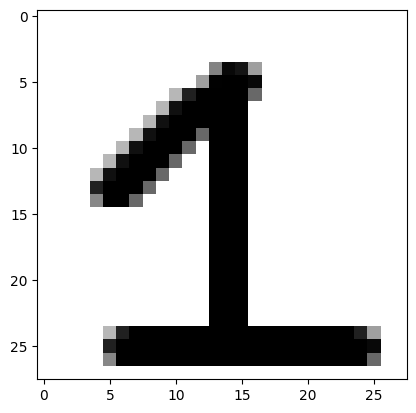

1/1 [==============================] - 0s 17ms/step
The number is probably a 2


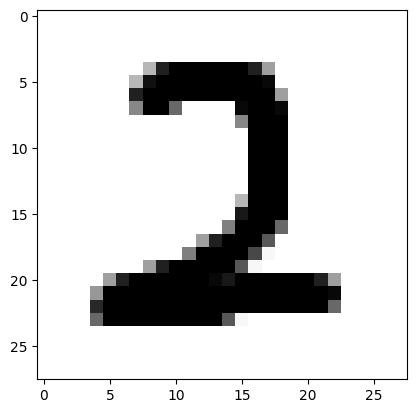

1/1 [==============================] - 0s 16ms/step
The number is probably a 5


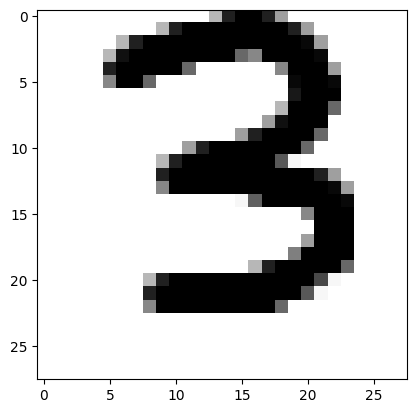

1/1 [==============================] - 0s 15ms/step
The number is probably a 7


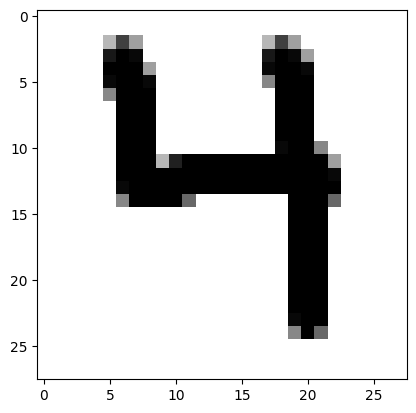

1/1 [==============================] - 0s 16ms/step
The number is probably a 5


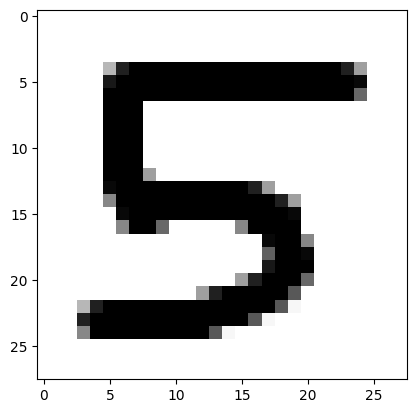

1/1 [==============================] - 0s 15ms/step
The number is probably a 2


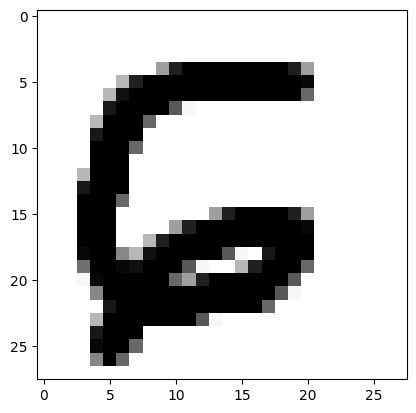

1/1 [==============================] - 0s 15ms/step
The number is probably a 2


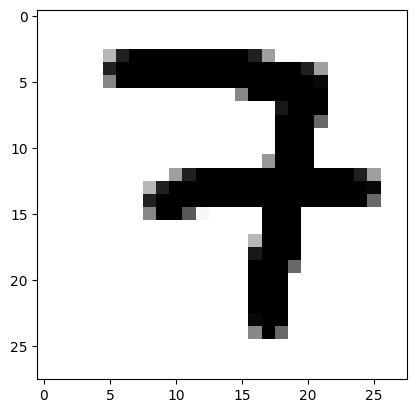

1/1 [==============================] - 0s 15ms/step
The number is probably a 8


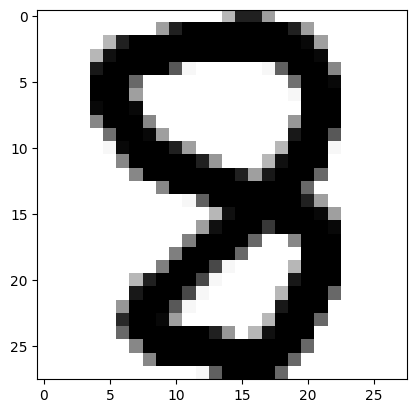

1/1 [==============================] - 0s 16ms/step
The number is probably a 3


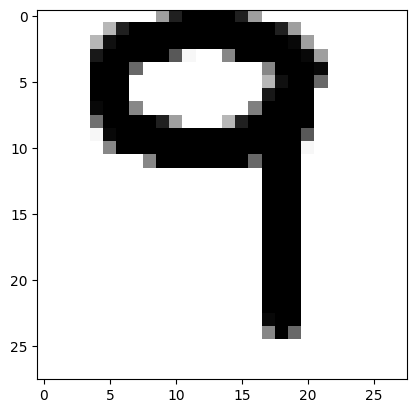

In [9]:
# test model
model = tf.keras.models.load_model('handwriting_recognition.model')
# test model
image_number = 1
while os.path.isfile(f"digits/digit{image_number}.png"):
    try:
        img = cv2.imread(f"digits/digit{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"The number is probably a {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("An exception occurred")
    finally:
        image_number += 1

The test results indicate a significant contrast in performance between the CNN and Sequential models:

1. **CNN Model:**
   - Accuracy: 9 out of 10 correct predictions.
   - The CNN model demonstrated high accuracy, accurately identifying 9 out of 10 handwritten digits. This underscores its efficacy in capturing spatial features and patterns in the images.

2. **Sequential Model:**
   - Accuracy: 3 out of 10 correct predictions.
   - The Sequential model, with a lower accuracy of 3 out of 10, displayed comparatively limited effectiveness in recognizing handwritten digits. This suggests that the sequential architecture may have constraints in handling the complexities of image data.

**Conclusion:**
   - The CNN model outperformed the Sequential model, emphasizing the importance of utilizing convolutional layers for image classification tasks.
   - The results underscore the CNN's ability to discern intricate features in handwritten digits, contributing to a higher accuracy compared to the Sequential model.
   - It's important to note that other models, beyond the ones tested here, may offer competitive or superior performance. Exploring alternative architectures provides the opportunity to discover models that align more closely with specific requirements or datasets.